In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/road-accidents-in-india-20142017/Road_Accidents_2017-Annuxure_Tables_3.csv
/kaggle/input/road-accidents-in-india-20142017/Acc_clf_acco_to_Road_Cond_2014_and_2016.csv
/kaggle/input/road-accidents-in-india-20142017/Acc_Classified_according_to_Type_of_Weather_Condition_2014_and_2016.csv
/kaggle/input/road-accidents-in-india-20142017/Road_Accidents_2017-Annuxure_Tables_4.csv


##Loading Datasets

In [2]:
acc_type_weather=pd.read_csv("/kaggle/input/road-accidents-in-india-20142017/Acc_Classified_according_to_Type_of_Weather_Condition_2014_and_2016.csv")
acc_type_road=pd.read_csv("/kaggle/input/road-accidents-in-india-20142017/Acc_clf_acco_to_Road_Cond_2014_and_2016.csv")
death=pd.read_csv("/kaggle/input/road-accidents-in-india-20142017/Road_Accidents_2017-Annuxure_Tables_3.csv")
injured=pd.read_csv("/kaggle/input/road-accidents-in-india-20142017/Road_Accidents_2017-Annuxure_Tables_4.csv")                

In [3]:

print("shape of acc_typeweather",acc_type_weather.shape)
print("shape of acc_typeroad",acc_type_road.shape)
print("shape of death",death.shape)
print("shape of injured",injured.shape)



shape of acc_typeweather (37, 65)
shape of acc_typeroad (37, 98)
shape of death (37, 19)
shape of injured (37, 19)


In [4]:
acc_type_weather.head()

,S. No.,State/ UT,Fine - Total Acc. - 2014,Fine - Persons Killed - 2014,Fine - Persons Injured - 2014,Mist/fog - Total Acc. - 2014,Mist/fog - Persons Killed - 2014,Mist/fog - Persons Injured - 2014,Cloudy - Total Acc. - 2014,Cloudy - Persons Killed - 2014,...,Snowfall - Persons Injured - 2016,Hail/Sleet - Total Accidents - 2016,Hail/Sleet - Persons Killed - 2016,Hail/Sleet - Persons Injured - 2016,Dust Storm - Total Accidents - 2016,Dust Storm - Persons Killed - 2016,Dust Storm - Persons Injured - 2016,Others - Total Accidents - 2016,Others - Persons Killed - 2016,Others - Persons Injured - 2016
0,1,Andhra Pradesh,14591.0,4586,17065.0,724.0,219,925.0,647.0,188.0,...,0,92,45,137,42,34,61,2839,1086,3408
1,2,Arunachal Pradesh,71.0,30,110.0,14.0,10,26.0,11.0,8.0,...,0,12,7,13,0,0,0,44,22,91
2,3,Assam,3575.0,1318,3216.0,494.0,150,368.0,285.0,100.0,...,0,15,8,5,36,14,19,2188,763,1752
3,4,Bihar,2343.0,1218,1626.0,1713.0,881,1081.0,438.0,203.0,...,0,0,0,0,582,318,399,1820,1175,1247
4,5,Chhattisgarh,5000.0,1354,4584.0,382.0,149,376.0,863.0,216.0,...,0,0,0,0,132,28,151,3972,1262,3793


In [5]:
acc_type_road.head()

,S. No.,State/ UT,Surfaced Roads-Accident - 2014,Surfaced Roads- Killed - 2014,Surfaced Roads-Injured - 2014,Metalled Roads-Accident - 2014,Metalled Roads- Killed - 2014,Metalled Roads-Injured - 2014,Kutcha Roads-Accident - 2014,Kutcha Roads- Killed - 2014,...,Sharp Curve - Persons Injured - 2016,Steep Gradient - Number of Accidents - 2016,Steep Gradient - Persons Killed - 2016,Steep Gradient - Persons Injured - 2016,Earthern Shoulder Edge Drop - Number of Accidents - 2016,Earthern Shoulder Edge Drop - Persons Killed - 2016,Earthern Shoulder Edge Drop - Persons Injured - 2016,Others - Number of Accidents - 2016,Others - Persons Killed - 2016,Others - Persons Injured - 2016
0,1,Andhra Pradesh,13846.0,4333,17323.0,5211.0,2392,4138.0,5383.0,1183,...,1185,144,38,189,255,145,302,3651,1290,4420
1,2,Arunachal Pradesh,81.0,43,111.0,73.0,37,97.0,51.0,39,...,65,0,0,0,0,0,0,44,22,91
2,3,Assam,4948.0,1631,5043.0,1296.0,548,824.0,900.0,343,...,22,44,9,24,2,2,9,1634,645,1153
3,4,Bihar,5990.0,3184,3732.0,2194.0,1148,1601.0,1372.0,581,...,491,117,59,119,123,65,133,1328,773,944
4,5,Chhattisgarh,7248.0,2111,7170.0,4799.0,1301,4543.0,1774.0,610,...,152,109,39,114,8,2,8,1499,453,1329


#First five rows of datasets

In [6]:
death.head()

,States/UTs,State/UT-wise Total Number of Persons Killed in Road Accidents during - 2014,State/UT-wise Total Number of Persons Killed in Road Accidents during - 2015,State/UT-wise Total Number of Persons Killed in Road Accidents during - 2016,State/UT-wise Total Number of Persons Killed in Road Accidents during - 2017,Share of States/UTs in Total Number of Persons Killed in Road Accidents - 2014,Share of States/UTs in Total Number of Persons Killed in Road Accidents - 2015,Share of States/UTs in Total Number of Persons Killed in Road Accidents - 2016,Share of States/UTs in Total Number of Persons Killed in Road Accidents - 2017,Total Number of Persons Killed in Road Accidents Per Lakh Population - 2014,Total Number of Persons Killed in Road Accidents Per Lakh Population - 2015,Total Number of Persons Killed in Road Accidents Per Lakh Population - 2016,Total Number of Persons Killed in Road Accidents Per Lakh Population - 2017,"Total Number of Persons Killed in Road Accidents per 10,000 Vehicles - 2014","Total Number of Persons Killed in Road Accidents per 10,000 Vehicles - 2015","Total Number of Persons Killed in Road Accidents per 10,000 Vehicles - 2016","Total Number of Persons Killed in Road Accidents per 10,000 Km of Roads - 2014","Total Number of Persons Killed in Road Accidents per 10,000 Km of Roads - 2015","Total Number of Persons Killed in Road Accidents per 10,000 Km of Roads - 2016"
0,Andhra Pradesh,7908,8297,8541,8060,5.7,5.7,5.7,5.4,9.1,9.5,9.7,9.1,11.3,10.5,9.8,444.0,463.5,489.8
1,Arunachal Pradesh,119,127,149,110,0.1,0.1,0.1,0.1,9.3,9.8,11.3,8.3,7.9,8.4,5.6,48.6,50.1,48.5
2,Assam,2522,2397,2572,2783,1.8,1.6,1.7,1.9,8.0,7.5,7.9,8.5,11.4,9.6,9.1,80.4,73.4,78.1
3,Bihar,4913,5421,4901,5554,3.5,3.7,3.3,3.8,4.8,5.3,4.7,5.3,11.8,11.3,8.9,234.2,263.1,237.4
4,Chhattisgarh,4022,4082,3908,4136,2.9,2.8,2.6,2.8,15.9,16.0,15.1,15.8,10.4,9.5,8.1,425.3,418.5,407.9


In [7]:
injured.tail()

,States/UTs,State/UT-wise Total Number of Persons Injured in Road Accidents during - 2014,State/UT-wise Total Number of Persons Injured in Road Accidents during - 2015,State/UT-wise Total Number of Persons Injured in Road Accidents during - 2016,State/UT-wise Total Number of Persons Injured in Road Accidents during - 2017,Share of States/UTs in Total Number of Persons Injured in Road Accidents - 2014,Share of States/UTs in Total Number of Persons Injured in Road Accidents - 2015,Share of States/UTs in Total Number of Persons Injured in Road Accidents - 2016,Share of States/UTs in Total Number of Persons Injured in Road Accidents - 2017,Total Number of Persons Injured in Road Accidents Per Lakh Population - 2014,Total Number of Persons Injured in Road Accidents Per Lakh Population - 2015,Total Number of Persons Injured in Road Accidents Per Lakh Population - 2016,Total Number of Persons Injured in Road Accidents Per Lakh Population - 2017,"Total Number of Persons injured in Road Accidents per 10,000 Vehicles - 2014","Total Number of Persons injured in Road Accidents per 10,000 Vehicles - 2015","Total Number of Persons injured in Road Accidents per 10,000 Vehicles - 2016","Total Number of Persons injured in Road Accidents per 10,000 Km of Roads - 2014","Total Number of Persons injured in Road Accidents per 10,000 Km of Roads - 2015","Total Number of Persons injured in Road Accidents per 10,000 Km of Roads - 2016"
32,Daman & Diu,49,64,102,70,0.0,0.0,0.0,0.0,16.1,20.2,30.9,20.3,5.1,6.4,9.7,966.5,1226.1,2058.1
33,Delhi,8283,8258,7154,6604,1.7,1.7,1.4,1.4,41.2,39.9,33.6,30.2,10.0,9.3,7.4,2588.8,2575.2,4059.0
34,Lakshadweep,1,3,0,1,0.0,0.0,0.0,0.0,1.3,3.8,0.0,1.2,0.8,2.1,0.0,48.1,140.2,0.0
35,Puducherry,1323,1552,1786,1741,0.3,0.3,0.4,0.4,84.1,95.4,107.0,100.5,17.6,19.3,20.7,4380.9,5051.9,5627.7
36,Total,493474,500279,494624,470975,100.0,100.0,100.0,100.0,39.8,39.9,39.0,36.7,25.9,23.8,21.5,1096.0,1094.2,1051.7


In [8]:
pd.options.display.max_rows=100
acc_type_road.isna().sum().sort_values(ascending=False)


Others-Injured - 2014                                       1
Rutted/Pot holes-Injured - 2014                             1
Road under repair/construction-Injured - 2014               1
Corrugated/Wavy road-Accident - 2014                        1
Corrugated/Wavy road-Injured - 2014                         1
Slippery surface-Accident - 2014                            1
Snowy-Accident - 2014                                       1
Snowy-Injured - 2014                                        1
Muddy-Accident - 2014                                       1
Muddy-Injured - 2014                                        1
Oily-Accident - 2014                                        1
Oily-Injured - 2014                                         1
Speed breaker-Accident - 2014                               1
Speed breaker-Injured - 2014                                1
Others-Accident - 2014                                      1
Straight Road-Accidents - 2014                              1
Straight

In [9]:
death.columns

Index(['States/UTs',
       'State/UT-wise Total Number of Persons Killed in Road Accidents during - 2014',
       'State/UT-wise Total Number of Persons Killed in Road Accidents during - 2015',
       'State/UT-wise Total Number of Persons Killed in Road Accidents during - 2016',
       'State/UT-wise Total Number of Persons Killed in Road Accidents during - 2017',
       'Share of States/UTs in Total Number of Persons Killed in Road Accidents - 2014',
       'Share of States/UTs in Total Number of Persons Killed in Road Accidents - 2015',
       'Share of States/UTs in Total Number of Persons Killed in Road Accidents - 2016',
       'Share of States/UTs in Total Number of Persons Killed in Road Accidents - 2017',
       'Total Number of Persons Killed in Road Accidents Per Lakh Population - 2014',
       'Total Number of Persons Killed in Road Accidents Per Lakh Population - 2015',
       'Total Number of Persons Killed in Road Accidents Per Lakh Population - 2016',
       'Total Num

Calculationg Total Population of each state using given dataframes

In [10]:

# Columns for total number of persons killed and corresponding rates
death_columns = [
    'State/UT-wise Total Number of Persons Killed in Road Accidents during - 2014',
    'State/UT-wise Total Number of Persons Killed in Road Accidents during - 2015',
    'State/UT-wise Total Number of Persons Killed in Road Accidents during - 2016',
    'State/UT-wise Total Number of Persons Killed in Road Accidents during - 2017'
]

population_columns = [
    'Total Number of Persons Killed in Road Accidents Per Lakh Population - 2014',
    'Total Number of Persons Killed in Road Accidents Per Lakh Population - 2015',
    'Total Number of Persons Killed in Road Accidents Per Lakh Population - 2016',
    'Total Number of Persons Killed in Road Accidents Per Lakh Population - 2017'
]

# Calculate estimated total population for each year
for i, death_column in enumerate(death_columns):
    population_column = population_columns[i]
    estimated_population_column = f'Estimated Total Population - {death_column[-4:]}'
    
    death[estimated_population_column] = (
        death[death_column] / death[population_column] * 100000
    )

# Drop the original estimated total population columns
death.drop(columns=population_columns, inplace=True)

# Display the updated DataFrame
death.head()

,States/UTs,State/UT-wise Total Number of Persons Killed in Road Accidents during - 2014,State/UT-wise Total Number of Persons Killed in Road Accidents during - 2015,State/UT-wise Total Number of Persons Killed in Road Accidents during - 2016,State/UT-wise Total Number of Persons Killed in Road Accidents during - 2017,Share of States/UTs in Total Number of Persons Killed in Road Accidents - 2014,Share of States/UTs in Total Number of Persons Killed in Road Accidents - 2015,Share of States/UTs in Total Number of Persons Killed in Road Accidents - 2016,Share of States/UTs in Total Number of Persons Killed in Road Accidents - 2017,"Total Number of Persons Killed in Road Accidents per 10,000 Vehicles - 2014","Total Number of Persons Killed in Road Accidents per 10,000 Vehicles - 2015","Total Number of Persons Killed in Road Accidents per 10,000 Vehicles - 2016","Total Number of Persons Killed in Road Accidents per 10,000 Km of Roads - 2014","Total Number of Persons Killed in Road Accidents per 10,000 Km of Roads - 2015","Total Number of Persons Killed in Road Accidents per 10,000 Km of Roads - 2016",Estimated Total Population - 2014,Estimated Total Population - 2015,Estimated Total Population - 2016,Estimated Total Population - 2017
0,Andhra Pradesh,7908,8297,8541,8060,5.7,5.7,5.7,5.4,11.3,10.5,9.8,444.0,463.5,489.8,8.690110e+07,8.733684e+07,8.805155e+07,8.857143e+07
1,Arunachal Pradesh,119,127,149,110,0.1,0.1,0.1,0.1,7.9,8.4,5.6,48.6,50.1,48.5,1.279570e+06,1.295918e+06,1.318584e+06,1.325301e+06
2,Assam,2522,2397,2572,2783,1.8,1.6,1.7,1.9,11.4,9.6,9.1,80.4,73.4,78.1,3.152500e+07,3.196000e+07,3.255696e+07,3.274118e+07
3,Bihar,4913,5421,4901,5554,3.5,3.7,3.3,3.8,11.8,11.3,8.9,234.2,263.1,237.4,1.023542e+08,1.022830e+08,1.042766e+08,1.047925e+08
4,Chhattisgarh,4022,4082,3908,4136,2.9,2.8,2.6,2.8,10.4,9.5,8.1,425.3,418.5,407.9,2.529560e+07,2.551250e+07,2.588079e+07,2.617722e+07


In [11]:
death.columns

Index(['States/UTs',
       'State/UT-wise Total Number of Persons Killed in Road Accidents during - 2014',
       'State/UT-wise Total Number of Persons Killed in Road Accidents during - 2015',
       'State/UT-wise Total Number of Persons Killed in Road Accidents during - 2016',
       'State/UT-wise Total Number of Persons Killed in Road Accidents during - 2017',
       'Share of States/UTs in Total Number of Persons Killed in Road Accidents - 2014',
       'Share of States/UTs in Total Number of Persons Killed in Road Accidents - 2015',
       'Share of States/UTs in Total Number of Persons Killed in Road Accidents - 2016',
       'Share of States/UTs in Total Number of Persons Killed in Road Accidents - 2017',
       'Total Number of Persons Killed in Road Accidents per 10,000 Vehicles - 2014',
       'Total Number of Persons Killed in Road Accidents per 10,000 Vehicles - 2015',
       'Total Number of Persons Killed in Road Accidents per 10,000 Vehicles - 2016',
       'Total Num

In [12]:
deaths=death.drop(columns=['Share of States/UTs in Total Number of Persons Killed in Road Accidents - 2014',
       'Share of States/UTs in Total Number of Persons Killed in Road Accidents - 2015',
       'Share of States/UTs in Total Number of Persons Killed in Road Accidents - 2016',
       'Share of States/UTs in Total Number of Persons Killed in Road Accidents - 2017',
       'Total Number of Persons Killed in Road Accidents per 10,000 Vehicles - 2014',
       'Total Number of Persons Killed in Road Accidents per 10,000 Vehicles - 2015',
       'Total Number of Persons Killed in Road Accidents per 10,000 Vehicles - 2016',
       'Total Number of Persons Killed in Road Accidents per 10,000 Km of Roads - 2014',
       'Total Number of Persons Killed in Road Accidents per 10,000 Km of Roads - 2015',
       'Total Number of Persons Killed in Road Accidents per 10,000 Km of Roads - 2016'])

In [13]:
deaths.head()

,States/UTs,State/UT-wise Total Number of Persons Killed in Road Accidents during - 2014,State/UT-wise Total Number of Persons Killed in Road Accidents during - 2015,State/UT-wise Total Number of Persons Killed in Road Accidents during - 2016,State/UT-wise Total Number of Persons Killed in Road Accidents during - 2017,Estimated Total Population - 2014,Estimated Total Population - 2015,Estimated Total Population - 2016,Estimated Total Population - 2017
0,Andhra Pradesh,7908,8297,8541,8060,8.690110e+07,8.733684e+07,8.805155e+07,8.857143e+07
1,Arunachal Pradesh,119,127,149,110,1.279570e+06,1.295918e+06,1.318584e+06,1.325301e+06
2,Assam,2522,2397,2572,2783,3.152500e+07,3.196000e+07,3.255696e+07,3.274118e+07
3,Bihar,4913,5421,4901,5554,1.023542e+08,1.022830e+08,1.042766e+08,1.047925e+08
4,Chhattisgarh,4022,4082,3908,4136,2.529560e+07,2.551250e+07,2.588079e+07,2.617722e+07


In [14]:
deaths.columns

Index(['States/UTs',
       'State/UT-wise Total Number of Persons Killed in Road Accidents during - 2014',
       'State/UT-wise Total Number of Persons Killed in Road Accidents during - 2015',
       'State/UT-wise Total Number of Persons Killed in Road Accidents during - 2016',
       'State/UT-wise Total Number of Persons Killed in Road Accidents during - 2017',
       'Estimated Total Population - 2014',
       'Estimated Total Population - 2015',
       'Estimated Total Population - 2016',
       'Estimated Total Population - 2017'],
      dtype='object')

In [15]:
# Use the melt function to unpivot the DataFrame
melted_df = pd.melt(deaths, id_vars=['States/UTs'],
                    value_vars=['State/UT-wise Total Number of Persons Killed in Road Accidents during - 2014',
       'State/UT-wise Total Number of Persons Killed in Road Accidents during - 2015',
       'State/UT-wise Total Number of Persons Killed in Road Accidents during - 2016',
       'State/UT-wise Total Number of Persons Killed in Road Accidents during - 2017',
                               ],
                    var_name='Year', value_name='Total_Persons_killed')
 
# Extract the year from the 'Year' column
melted_df['Year'] = melted_df['Year'].str.extract(r'(\d{4})').astype(int)
 
# Display the result
print(melted_df[['States/UTs', 'Total_Persons_killed', 'Year']].head())

          States/UTs  Total_Persons_killed  Year
0     Andhra Pradesh                  7908  2014
1  Arunachal Pradesh                   119  2014
2              Assam                  2522  2014
3              Bihar                  4913  2014
4       Chhattisgarh                  4022  2014


In [16]:
# Use the melt function to unpivot the DataFrame
melted_df1 = pd.melt(deaths, id_vars=['States/UTs'],
                    value_vars=['Estimated Total Population - 2014',
       'Estimated Total Population - 2015',
       'Estimated Total Population - 2016',
       'Estimated Total Population - 2017'],
                    var_name='Year', value_name='Total_population')
 
# Extract the year from the 'Year' column
melted_df1['Year'] = melted_df1['Year'].str.extract(r'(\d{4})').astype(int)
 
# Display the result
print(melted_df1[['States/UTs', 'Total_population', 'Year']].head())

          States/UTs  Total_population  Year
0     Andhra Pradesh      8.690110e+07  2014
1  Arunachal Pradesh      1.279570e+06  2014
2              Assam      3.152500e+07  2014
3              Bihar      1.023542e+08  2014
4       Chhattisgarh      2.529560e+07  2014


In [17]:
deaths_combine=pd.merge(melted_df,melted_df1,on=['States/UTs','Year'])

In [18]:
deaths_combine


,States/UTs,Year,Total_Persons_killed,Total_population
0,Andhra Pradesh,2014,7908,8.690110e+07
1,Arunachal Pradesh,2014,119,1.279570e+06
2,Assam,2014,2522,3.152500e+07
3,Bihar,2014,4913,1.023542e+08
4,Chhattisgarh,2014,4022,2.529560e+07
...,...,...,...,...
143,Daman & Diu,2017,36,3.428571e+05
144,Delhi,2017,1584,2.200000e+07
145,Lakshadweep,2017,0,NaN
146,Puducherry,2017,233,1.738806e+06


In [19]:
deaths_combine['Year'].value_counts()

Year
2014    37
2015    37
2016    37
2017    37
Name: count, dtype: int64

In [20]:
injured.columns

Index(['States/UTs',
       'State/UT-wise Total Number of Persons Injured in Road Accidents during - 2014',
       'State/UT-wise Total Number of Persons Injured in Road Accidents during - 2015',
       'State/UT-wise Total Number of Persons Injured in Road Accidents during - 2016',
       'State/UT-wise Total Number of Persons Injured in Road Accidents during - 2017',
       'Share of States/UTs in Total Number of Persons Injured in Road Accidents - 2014',
       'Share of States/UTs in Total Number of Persons Injured in Road Accidents - 2015',
       'Share of States/UTs in Total Number of Persons Injured in Road Accidents - 2016',
       'Share of States/UTs in Total Number of Persons Injured in Road Accidents - 2017',
       'Total Number of Persons Injured in Road Accidents Per Lakh Population - 2014',
       'Total Number of Persons Injured in Road Accidents Per Lakh Population - 2015',
       'Total Number of Persons Injured in Road Accidents Per Lakh Population - 2016',
      

#Lets Clean the injured data and create dataframe as like as deaths 

In [21]:
# Assuming your DataFrame is named 'road_accidents_data'
# Replace 'road_accidents_data' with the actual name of your DataFrame

# Columns for total number of persons killed and corresponding rates
injured_columns = [
    'State/UT-wise Total Number of Persons Injured in Road Accidents during - 2014',
       'State/UT-wise Total Number of Persons Injured in Road Accidents during - 2015',
       'State/UT-wise Total Number of Persons Injured in Road Accidents during - 2016',
       'State/UT-wise Total Number of Persons Injured in Road Accidents during - 2017'
]

population_columns = [
      'Total Number of Persons Injured in Road Accidents Per Lakh Population - 2014',
       'Total Number of Persons Injured in Road Accidents Per Lakh Population - 2015',
       'Total Number of Persons Injured in Road Accidents Per Lakh Population - 2016',
       'Total Number of Persons Injured in Road Accidents Per Lakh Population - 2017'
]

# Calculate estimated total population for each year
for i, injured_column in enumerate(injured_columns):
    population_column = population_columns[i]
    estimated_population_column = f'Estimated Total Population - {injured_column[-4:]}'
    
    injured[estimated_population_column] = (
        injured[injured_column] / injured[population_column] * 100000
    )

# Drop the original estimated total population columns
injured.drop(columns=population_columns, inplace=True)

# Display the updated DataFrame
injured.head()

,States/UTs,State/UT-wise Total Number of Persons Injured in Road Accidents during - 2014,State/UT-wise Total Number of Persons Injured in Road Accidents during - 2015,State/UT-wise Total Number of Persons Injured in Road Accidents during - 2016,State/UT-wise Total Number of Persons Injured in Road Accidents during - 2017,Share of States/UTs in Total Number of Persons Injured in Road Accidents - 2014,Share of States/UTs in Total Number of Persons Injured in Road Accidents - 2015,Share of States/UTs in Total Number of Persons Injured in Road Accidents - 2016,Share of States/UTs in Total Number of Persons Injured in Road Accidents - 2017,"Total Number of Persons injured in Road Accidents per 10,000 Vehicles - 2014","Total Number of Persons injured in Road Accidents per 10,000 Vehicles - 2015","Total Number of Persons injured in Road Accidents per 10,000 Vehicles - 2016","Total Number of Persons injured in Road Accidents per 10,000 Km of Roads - 2014","Total Number of Persons injured in Road Accidents per 10,000 Km of Roads - 2015","Total Number of Persons injured in Road Accidents per 10,000 Km of Roads - 2016",Estimated Total Population - 2014,Estimated Total Population - 2015,Estimated Total Population - 2016,Estimated Total Population - 2017
0,Andhra Pradesh,29931,29439,30051,27475,6.1,5.9,6.1,5.8,42.7,37.3,34.4,1680.6,1644.4,1723.4,8.700872e+07,8.761607e+07,8.838529e+07,8.891586e+07
1,Arunachal Pradesh,308,359,391,316,0.1,0.1,0.1,0.1,20.4,23.7,14.8,125.9,141.6,127.4,1.283333e+06,1.300725e+06,1.312081e+06,1.327731e+06
2,Assam,6499,7068,6127,6163,1.3,1.4,1.2,1.3,29.3,28.2,21.7,207.2,216.5,185.9,3.170244e+07,3.212727e+07,3.241799e+07,3.278191e+07
3,Bihar,6640,6835,5651,6014,1.3,1.4,1.1,1.3,15.9,14.3,10.3,316.6,331.8,273.7,1.021538e+08,1.020149e+08,1.046481e+08,1.055088e+08
4,Chhattisgarh,13157,13426,12955,12550,2.7,2.7,2.6,2.7,34.0,31.1,26.9,1391.1,1376.5,1352.2,2.525336e+07,2.557333e+07,2.585828e+07,2.620042e+07


In [22]:
injured.columns

Index(['States/UTs',
       'State/UT-wise Total Number of Persons Injured in Road Accidents during - 2014',
       'State/UT-wise Total Number of Persons Injured in Road Accidents during - 2015',
       'State/UT-wise Total Number of Persons Injured in Road Accidents during - 2016',
       'State/UT-wise Total Number of Persons Injured in Road Accidents during - 2017',
       'Share of States/UTs in Total Number of Persons Injured in Road Accidents - 2014',
       'Share of States/UTs in Total Number of Persons Injured in Road Accidents - 2015',
       'Share of States/UTs in Total Number of Persons Injured in Road Accidents - 2016',
       'Share of States/UTs in Total Number of Persons Injured in Road Accidents - 2017',
       'Total Number of Persons injured in Road Accidents per 10,000 Vehicles - 2014',
       'Total Number of Persons injured in Road Accidents per 10,000 Vehicles - 2015',
       'Total Number of Persons injured in Road Accidents per 10,000 Vehicles - 2016',
      

In [23]:
injureds=injured.drop(columns=['Share of States/UTs in Total Number of Persons Injured in Road Accidents - 2014',
       'Share of States/UTs in Total Number of Persons Injured in Road Accidents - 2015',
       'Share of States/UTs in Total Number of Persons Injured in Road Accidents - 2016',
       'Share of States/UTs in Total Number of Persons Injured in Road Accidents - 2017',
       'Total Number of Persons injured in Road Accidents per 10,000 Vehicles - 2014',
       'Total Number of Persons injured in Road Accidents per 10,000 Vehicles - 2015',
       'Total Number of Persons injured in Road Accidents per 10,000 Vehicles - 2016',
       'Total Number of Persons injured in Road Accidents per 10,000 Km of Roads - 2014',
       'Total Number of Persons injured in Road Accidents per 10,000 Km of Roads - 2015',
       'Total Number of Persons injured in Road Accidents per 10,000 Km of Roads - 2016'])

In [24]:
injureds.head()

,States/UTs,State/UT-wise Total Number of Persons Injured in Road Accidents during - 2014,State/UT-wise Total Number of Persons Injured in Road Accidents during - 2015,State/UT-wise Total Number of Persons Injured in Road Accidents during - 2016,State/UT-wise Total Number of Persons Injured in Road Accidents during - 2017,Estimated Total Population - 2014,Estimated Total Population - 2015,Estimated Total Population - 2016,Estimated Total Population - 2017
0,Andhra Pradesh,29931,29439,30051,27475,8.700872e+07,8.761607e+07,8.838529e+07,8.891586e+07
1,Arunachal Pradesh,308,359,391,316,1.283333e+06,1.300725e+06,1.312081e+06,1.327731e+06
2,Assam,6499,7068,6127,6163,3.170244e+07,3.212727e+07,3.241799e+07,3.278191e+07
3,Bihar,6640,6835,5651,6014,1.021538e+08,1.020149e+08,1.046481e+08,1.055088e+08
4,Chhattisgarh,13157,13426,12955,12550,2.525336e+07,2.557333e+07,2.585828e+07,2.620042e+07


In [25]:
# Use the melt function to unpivot the DataFrame
injured_df1 = pd.melt(injureds, id_vars=['States/UTs'],
                    value_vars=['State/UT-wise Total Number of Persons Injured in Road Accidents during - 2014',
                                'State/UT-wise Total Number of Persons Injured in Road Accidents during - 2015',
                                'State/UT-wise Total Number of Persons Injured in Road Accidents during - 2016',
                                'State/UT-wise Total Number of Persons Injured in Road Accidents during - 2017',
                               ],
                    var_name='Year', value_name='Total_Persons_Injured')
 
# Extract the year from the 'Year' column
injured_df1['Year'] = injured_df1['Year'].str.extract(r'(\d{4})').astype(int)
 
# Display the result
print(injured_df1[['States/UTs', 'Total_Persons_Injured', 'Year']].head())

          States/UTs  Total_Persons_Injured  Year
0     Andhra Pradesh                  29931  2014
1  Arunachal Pradesh                    308  2014
2              Assam                   6499  2014
3              Bihar                   6640  2014
4       Chhattisgarh                  13157  2014


In [26]:
# Use the melt function to unpivot the DataFrame
injured_df2 = pd.melt(injureds, id_vars=['States/UTs'],
                    value_vars=['Estimated Total Population - 2014',
       'Estimated Total Population - 2015',
       'Estimated Total Population - 2016',
       'Estimated Total Population - 2017',
                               ],
                    var_name='Year', value_name='Total_population')
 
# Extract the year from the 'Year' column
injured_df2['Year'] = injured_df2['Year'].str.extract(r'(\d{4})').astype(int)
 
# Display the result
print(injured_df2[['States/UTs', 'Total_population', 'Year']].head())

          States/UTs  Total_population  Year
0     Andhra Pradesh      8.700872e+07  2014
1  Arunachal Pradesh      1.283333e+06  2014
2              Assam      3.170244e+07  2014
3              Bihar      1.021538e+08  2014
4       Chhattisgarh      2.525336e+07  2014


In [27]:
injured_combine=pd.merge(injured_df1,injured_df2,on=["States/UTs","Year"])
injured_combine.head()

,States/UTs,Year,Total_Persons_Injured,Total_population
0,Andhra Pradesh,2014,29931,8.700872e+07
1,Arunachal Pradesh,2014,308,1.283333e+06
2,Assam,2014,6499,3.170244e+07
3,Bihar,2014,6640,1.021538e+08
4,Chhattisgarh,2014,13157,2.525336e+07


In [28]:
deaths_combine.head()

,States/UTs,Year,Total_Persons_killed,Total_population
0,Andhra Pradesh,2014,7908,8.690110e+07
1,Arunachal Pradesh,2014,119,1.279570e+06
2,Assam,2014,2522,3.152500e+07
3,Bihar,2014,4913,1.023542e+08
4,Chhattisgarh,2014,4022,2.529560e+07


In [29]:
accident_data=pd.merge(deaths_combine,injured_combine,on=["States/UTs","Year"])

In [30]:
accident_data.head()

,States/UTs,Year,Total_Persons_killed,Total_population_x,Total_Persons_Injured,Total_population_y
0,Andhra Pradesh,2014,7908,8.690110e+07,29931,8.700872e+07
1,Arunachal Pradesh,2014,119,1.279570e+06,308,1.283333e+06
2,Assam,2014,2522,3.152500e+07,6499,3.170244e+07
3,Bihar,2014,4913,1.023542e+08,6640,1.021538e+08
4,Chhattisgarh,2014,4022,2.529560e+07,13157,2.525336e+07


In [31]:
accident_data.drop(["Total_population_y"],axis=1,inplace=True)

In [32]:
accident_data.head()

,States/UTs,Year,Total_Persons_killed,Total_population_x,Total_Persons_Injured
0,Andhra Pradesh,2014,7908,8.690110e+07,29931
1,Arunachal Pradesh,2014,119,1.279570e+06,308
2,Assam,2014,2522,3.152500e+07,6499
3,Bihar,2014,4913,1.023542e+08,6640
4,Chhattisgarh,2014,4022,2.529560e+07,13157


In [33]:
accident_data.rename(columns={'Total_population_x':'Total_population'}, inplace=True)
order=["States/UTs","Year","Total_Persons_killed","Total_Persons_Injured","Total_population"]
accident_data=accident_data[order]

In [34]:
accident_data.head()

,States/UTs,Year,Total_Persons_killed,Total_Persons_Injured,Total_population
0,Andhra Pradesh,2014,7908,29931,8.690110e+07
1,Arunachal Pradesh,2014,119,308,1.279570e+06
2,Assam,2014,2522,6499,3.152500e+07
3,Bihar,2014,4913,6640,1.023542e+08
4,Chhattisgarh,2014,4022,13157,2.529560e+07


In [35]:
acc_type_weather.head()

,S. No.,State/ UT,Fine - Total Acc. - 2014,Fine - Persons Killed - 2014,Fine - Persons Injured - 2014,Mist/fog - Total Acc. - 2014,Mist/fog - Persons Killed - 2014,Mist/fog - Persons Injured - 2014,Cloudy - Total Acc. - 2014,Cloudy - Persons Killed - 2014,...,Snowfall - Persons Injured - 2016,Hail/Sleet - Total Accidents - 2016,Hail/Sleet - Persons Killed - 2016,Hail/Sleet - Persons Injured - 2016,Dust Storm - Total Accidents - 2016,Dust Storm - Persons Killed - 2016,Dust Storm - Persons Injured - 2016,Others - Total Accidents - 2016,Others - Persons Killed - 2016,Others - Persons Injured - 2016
0,1,Andhra Pradesh,14591.0,4586,17065.0,724.0,219,925.0,647.0,188.0,...,0,92,45,137,42,34,61,2839,1086,3408
1,2,Arunachal Pradesh,71.0,30,110.0,14.0,10,26.0,11.0,8.0,...,0,12,7,13,0,0,0,44,22,91
2,3,Assam,3575.0,1318,3216.0,494.0,150,368.0,285.0,100.0,...,0,15,8,5,36,14,19,2188,763,1752
3,4,Bihar,2343.0,1218,1626.0,1713.0,881,1081.0,438.0,203.0,...,0,0,0,0,582,318,399,1820,1175,1247
4,5,Chhattisgarh,5000.0,1354,4584.0,382.0,149,376.0,863.0,216.0,...,0,0,0,0,132,28,151,3972,1262,3793


In [36]:
acc_type_weather.columns

Index(['S. No.', 'State/ UT', 'Fine - Total Acc. - 2014',
       'Fine - Persons Killed - 2014', 'Fine - Persons Injured - 2014',
       'Mist/fog - Total Acc. - 2014', 'Mist/fog - Persons Killed - 2014',
       'Mist/fog - Persons Injured - 2014', 'Cloudy - Total Acc. - 2014',
       'Cloudy - Persons Killed - 2014', 'Cloudy - Persons Injured - 2014',
       'Light rain - Total Acc. - 2014', 'Light rain - Persons Killed - 2014',
       'Light rain - Persons Injured - 2014', 'Heavy rain - Total Acc. - 2014',
       'Heavy rain - Persons Killed - 2014',
       'Heavy rain - Persons Injured - 2014',
       'Flooding of slipways/rivulers - Total Acc. - 2014',
       'Flooding of slipways/rivulers - Persons Killed - 2014',
       'Flooding of slipways/rivulers - Persons Injured - 2014',
       'Hail/sleet - Total Acc. - 2014', 'Hail/sleet - Persons Killed - 2014',
       'Hail/sleet - Persons Injured - 2014', 'snow - Total Acc. - 2014',
       'snow - Persons Killed - 2014', 'snow - Person

In [37]:

# Melt the DataFrame to convert from wide to long format
melted_df = pd.melt(acc_type_weather, id_vars=['S. No.', 'State/ UT'],value_vars=[

        'Fine - Persons Killed - 2014',

                'Mist/fog - Persons Killed - 2014',

                'Cloudy - Persons Killed - 2014',

                'Light rain - Persons Killed - 2014',

                'Heavy rain - Persons Killed - 2014',

                'Flooding of slipways/rivulers - Persons Killed - 2014',

                'Hail/sleet - Persons Killed - 2014',

                'snow - Persons Killed - 2014',

                'Strong wind - Persons Killed - 2014',

                'Dust storm - Persons Killed - 2014',

                'Very hot - Persons Killed - 2014',

                'Very cold - Persons Killed - 2014',
              
                'Other extraordinary weather condition - Persons Killed - 2014',

                    'Fine/Clear - Persons Killed - 2016',

                'Mist/ Foggy - Persons Killed - 2016',

                'Cloudy - Persons Killed - 2016',

                'Rainy - Persons Killed - 2016',

                'Snowfall - Persons Killed - 2016',

                'Hail/Sleet - Persons Killed - 2016',

                'Dust Storm - Persons Killed - 2016',

                'Others - Persons Killed - 2016'],
       var_name='Weather_Year', value_name='Value')

# Extract 'Weather' and 'Year' from the 'Weather_Year' column
melted_df['Year'] = melted_df['Weather_Year'].str.split('-').str.get(-1).astype(int)

#Extract the weather from the column names

melted_df['Weather']=melted_df['Weather_Year'].str.split('-').str.get(0)
 
# Filter out the rows where 'Value' is not NaN
#result_df = melted_df[melted_df['Value'].notna()]

# Rename the 'Value' column to 'Total_Injured_weather'
result_df = melted_df.rename(columns={'Value': 'Total_persons_killed_weather'})

# Print or use the resulting DataFrame as needed
result_df.head()

,S. No.,State/ UT,Weather_Year,Total_persons_killed_weather,Year,Weather
0,1,Andhra Pradesh,Fine - Persons Killed - 2014,4586.0,2014,Fine
1,2,Arunachal Pradesh,Fine - Persons Killed - 2014,30.0,2014,Fine
2,3,Assam,Fine - Persons Killed - 2014,1318.0,2014,Fine
3,4,Bihar,Fine - Persons Killed - 2014,1218.0,2014,Fine
4,5,Chhattisgarh,Fine - Persons Killed - 2014,1354.0,2014,Fine


In [38]:

# Melt the DataFrame to convert from wide to long format
melted_df = pd.melt(acc_type_weather, id_vars=['S. No.', 'State/ UT'],value_vars=['Fine - Total Acc. - 2014',
       'Mist/fog - Total Acc. - 2014',
       'Cloudy - Total Acc. - 2014',
       'Light rain - Total Acc. - 2014', 
        'Heavy rain - Total Acc. - 2014',
       
       'Flooding of slipways/rivulers - Total Acc. - 2014',   
       'Hail/sleet - Total Acc. - 2014', 
        'snow - Total Acc. - 2014',
       'Strong wind - Total Acc. - 2014',
       'Dust storm - Total Acc. - 2014','Very hot - Total Acc. - 2014',
       'Very cold - Total Acc. - 2014',
       'Other extraordinary weather condition - Total Acc. - 2014',
       'Fine/Clear - Total Accidents - 2016',
       
       'Mist/ Foggy - Total Accidents - 2016',
       'Cloudy - Total Accidents - 2016', 
      'Rainy - Total Accidents - 2016',
       'Snowfall - Total Accidents - 2016', 
      
       'Hail/Sleet - Total Accidents - 2016',
       
       'Dust Storm - Total Accidents - 2016',
       'Others - Total Accidents - 2016', 
       ],
       var_name='Weather_Year', value_name='Value')

# Extract 'Weather' and 'Year' from the 'Weather_Year' column
melted_df['Year'] = melted_df['Weather_Year'].str.split('-').str.get(-1).astype(int)

#Extract the weather from the column names

melted_df['Weather']=melted_df['Weather_Year'].str.split('-').str.get(0)
 
# Filter out the rows where 'Value' is not NaN
#result_df1 = melted_df[melted_df['Value'].notna()]

# Rename the 'Value' column to 'Total_Injured_weather'
result_df1 = melted_df.rename(columns={'Value': 'Total_Accidents_weather'})

# Print or use the resulting DataFrame as needed
result_df1.head()

,S. No.,State/ UT,Weather_Year,Total_Accidents_weather,Year,Weather
0,1,Andhra Pradesh,Fine - Total Acc. - 2014,14591.0,2014,Fine
1,2,Arunachal Pradesh,Fine - Total Acc. - 2014,71.0,2014,Fine
2,3,Assam,Fine - Total Acc. - 2014,3575.0,2014,Fine
3,4,Bihar,Fine - Total Acc. - 2014,2343.0,2014,Fine
4,5,Chhattisgarh,Fine - Total Acc. - 2014,5000.0,2014,Fine


In [39]:

# Melt the DataFrame to convert from wide to long format
melted_df = pd.melt(acc_type_weather, id_vars=['S. No.', 'State/ UT'],value_vars=['Fine - Persons Injured - 2014',
       'Mist/fog - Persons Injured - 2014',
      'Cloudy - Persons Injured - 2014',
       'Light rain - Persons Injured - 2014',
       'Heavy rain - Persons Injured - 2014',
       'Flooding of slipways/rivulers - Persons Injured - 2014',
       'Hail/sleet - Persons Injured - 2014','snow - Persons Injured - 2014',
       'Strong wind - Persons Injured - 2014',
       'Dust storm - Persons Injured - 2014', 
       'Very hot - Persons Injured - 2014',
       'Very cold - Persons Injured - 2014',
      
       'Other extraordinary weather condition - Persons Injured - 2014',
       'Fine/Clear - Persons Injured - 2016',
       'Mist/ Foggy - Persons Injured - 2016',
       'Cloudy - Persons Injured - 2016', 
      'Rainy - Persons Injured - 2016',
       'Snowfall - Persons Injured - 2016',
       'Hail/Sleet - Persons Injured - 2016',
       
       'Dust Storm - Persons Injured - 2016',
       'Others - Persons Injured - 2016'],
       var_name='Weather_Year', value_name='Value')

# Extract 'Weather' and 'Year' from the 'Weather_Year' column
melted_df['Year'] = melted_df['Weather_Year'].str.split('-').str.get(-1).astype(int)

#Extract the weather from the column names

melted_df['Weather']=melted_df['Weather_Year'].str.split('-').str.get(0)
 
# Filter out the rows where 'Value' is not NaN
#result_df2 = melted_df[melted_df['Value'].notna()]

# Rename the 'Value' column to 'Total_Injured_weather'
result_df2 = melted_df.rename(columns={'Value': 'Total_persons_injured_weather'})

# Print or use the resulting DataFrame as needed
result_df2.head()

,S. No.,State/ UT,Weather_Year,Total_persons_injured_weather,Year,Weather
0,1,Andhra Pradesh,Fine - Persons Injured - 2014,17065.0,2014,Fine
1,2,Arunachal Pradesh,Fine - Persons Injured - 2014,110.0,2014,Fine
2,3,Assam,Fine - Persons Injured - 2014,3216.0,2014,Fine
3,4,Bihar,Fine - Persons Injured - 2014,1626.0,2014,Fine
4,5,Chhattisgarh,Fine - Persons Injured - 2014,4584.0,2014,Fine


In [40]:
result_df2.shape

(777, 6)

In [41]:
two_dfs_weather=pd.merge(result_df,result_df1,on=["State/ UT","Year","Weather"])
Accidents_type_weather=pd.merge(two_dfs_weather,result_df2,on=["State/ UT","Year","Weather"])
Accidents_type_weather.drop(['S. No._x','S. No._y','S. No.','Weather_Year_x','Weather_Year_y','Weather_Year'],axis=1,inplace=True)

In [42]:
Accidents_type_weather.head()

,State/ UT,Total_persons_killed_weather,Year,Weather,Total_Accidents_weather,Total_persons_injured_weather
0,Andhra Pradesh,4586.0,2014,Fine,14591.0,17065.0
1,Arunachal Pradesh,30.0,2014,Fine,71.0,110.0
2,Assam,1318.0,2014,Fine,3575.0,3216.0
3,Bihar,1218.0,2014,Fine,2343.0,1626.0
4,Chhattisgarh,1354.0,2014,Fine,5000.0,4584.0


In [43]:
Accidents_type_weather.shape

(777, 6)

In [44]:
Accidents_type_weather.isnull().sum()

State/ UT                         0
Total_persons_killed_weather      9
Year                              0
Weather                           0
Total_Accidents_weather          13
Total_persons_injured_weather    13
dtype: int64

In [45]:
Accidents_type_weather.isnull().sum()

State/ UT                         0
Total_persons_killed_weather      9
Year                              0
Weather                           0
Total_Accidents_weather          13
Total_persons_injured_weather    13
dtype: int64

In [46]:
states=accident_data['States/UTs'].values.tolist()
set(states)

{'Andaman & Nicobar Islands',
 'Andhra Pradesh',
 'Arunachal Pradesh',
 'Assam',
 'Bihar',
 'Chandigarh',
 'Chhattisgarh',
 'Dadra & Nagar Haveli',
 'Daman & Diu',
 'Delhi',
 'Goa',
 'Gujarat',
 'Haryana',
 'Himachal Pradesh',
 'Jammu & Kashmir',
 'Jharkhand',
 'Karnataka',
 'Kerala',
 'Lakshadweep',
 'Madhya Pradesh',
 'Maharashtra',
 'Manipur',
 'Meghalaya',
 'Mizoram',
 'Nagaland',
 'Odisha',
 'Puducherry',
 'Punjab',
 'Rajasthan',
 'Sikkim',
 'Tamil Nadu',
 'Telangana',
 'Total',
 'Tripura',
 'Uttar Pradesh',
 'Uttarakhand',
 'West Bengal'}

In [47]:
Accidents_type_weather.rename(columns={"State/ UT":"States/UTs"},inplace=True)
print(Accidents_type_weather.columns)
print(accident_data.columns)

Index(['States/UTs', 'Total_persons_killed_weather', 'Year', 'Weather',
       'Total_Accidents_weather', 'Total_persons_injured_weather'],
      dtype='object')
Index(['States/UTs', 'Year', 'Total_Persons_killed', 'Total_Persons_Injured',
       'Total_population'],
      dtype='object')


In [48]:
state_mapping = {
    'A & N Islands':'Andaman & Nicobar Islands',
    'D & N Haveli':'Dadra & Nagar Haveli',
    'Orissa':'Odisha'
}

# Replace misspelled state names with correct names
Accidents_type_weather['States/UTs'] = Accidents_type_weather['States/UTs'].replace(state_mapping)

# Display the DataFrame after replacement

In [49]:
df_total=pd.merge(Accidents_type_weather,accident_data,on=["States/UTs","Year"])

In [50]:
df_total.head()

,States/UTs,Total_persons_killed_weather,Year,Weather,Total_Accidents_weather,Total_persons_injured_weather,Total_Persons_killed,Total_Persons_Injured,Total_population
0,Andhra Pradesh,4586.0,2014,Fine,14591.0,17065.0,7908,29931,8.690110e+07
1,Andhra Pradesh,219.0,2014,Mist/fog,724.0,925.0,7908,29931,8.690110e+07
2,Andhra Pradesh,188.0,2014,Cloudy,647.0,916.0,7908,29931,8.690110e+07
3,Andhra Pradesh,368.0,2014,Light rain,1104.0,1440.0,7908,29931,8.690110e+07
4,Andhra Pradesh,231.0,2014,Heavy rain,695.0,856.0,7908,29931,8.690110e+07


In [51]:
df_total.columns

Index(['States/UTs', 'Total_persons_killed_weather', 'Year', 'Weather',
       'Total_Accidents_weather', 'Total_persons_injured_weather',
       'Total_Persons_killed', 'Total_Persons_Injured', 'Total_population'],
      dtype='object')

Lets us rearrange our columns

In [52]:
order=['States/UTs', 'Year', 'Weather', 'Total_Persons_Injured','Total_persons_injured_weather',
       'Total_Persons_killed','Total_persons_killed_weather','Total_Accidents_weather','Total_population']
df_total=df_total[order]        
        

In [53]:




print(df_total.shape)
print(df_total.isnull().sum())

(777, 9)
States/UTs                        0
Year                              0
Weather                           0
Total_Persons_Injured             0
Total_persons_injured_weather    13
Total_Persons_killed              0
Total_persons_killed_weather      9
Total_Accidents_weather          13
Total_population                 34
dtype: int64


Now let us deal with Road_accident_data_set 

In [54]:
acc_type_road.head()

,S. No.,State/ UT,Surfaced Roads-Accident - 2014,Surfaced Roads- Killed - 2014,Surfaced Roads-Injured - 2014,Metalled Roads-Accident - 2014,Metalled Roads- Killed - 2014,Metalled Roads-Injured - 2014,Kutcha Roads-Accident - 2014,Kutcha Roads- Killed - 2014,...,Sharp Curve - Persons Injured - 2016,Steep Gradient - Number of Accidents - 2016,Steep Gradient - Persons Killed - 2016,Steep Gradient - Persons Injured - 2016,Earthern Shoulder Edge Drop - Number of Accidents - 2016,Earthern Shoulder Edge Drop - Persons Killed - 2016,Earthern Shoulder Edge Drop - Persons Injured - 2016,Others - Number of Accidents - 2016,Others - Persons Killed - 2016,Others - Persons Injured - 2016
0,1,Andhra Pradesh,13846.0,4333,17323.0,5211.0,2392,4138.0,5383.0,1183,...,1185,144,38,189,255,145,302,3651,1290,4420
1,2,Arunachal Pradesh,81.0,43,111.0,73.0,37,97.0,51.0,39,...,65,0,0,0,0,0,0,44,22,91
2,3,Assam,4948.0,1631,5043.0,1296.0,548,824.0,900.0,343,...,22,44,9,24,2,2,9,1634,645,1153
3,4,Bihar,5990.0,3184,3732.0,2194.0,1148,1601.0,1372.0,581,...,491,117,59,119,123,65,133,1328,773,944
4,5,Chhattisgarh,7248.0,2111,7170.0,4799.0,1301,4543.0,1774.0,610,...,152,109,39,114,8,2,8,1499,453,1329


In [55]:
pd.options.display.max_rows=100
acc_type_road.columns

Index(['S. No.', 'State/ UT', 'Surfaced Roads-Accident - 2014',
       'Surfaced Roads- Killed - 2014', 'Surfaced Roads-Injured - 2014',
       'Metalled Roads-Accident - 2014', 'Metalled Roads- Killed - 2014',
       'Metalled Roads-Injured - 2014', 'Kutcha Roads-Accident - 2014',
       'Kutcha Roads- Killed - 2014', 'Kutcha Roads-Injured - 2014',
       'Dry road-Accident - 2014', 'Dry road- Killed - 2014',
       'Dry road-Injured - 2014', 'Wet road-Accident - 2014',
       'Wet road- Killed - 2014', 'Wet road-Injured - 2014',
       'Good surface-Accident - 2014', 'Good surface- Killed - 2014',
       'Good surface-Injured - 2014', 'Loose Surface-Accident - 2014',
       'Loose Surface- Killed - 2014', 'Loose Surface-Injured - 2014',
       'Rutted/Pot holes-Accident - 2014', 'Rutted/Pot holes- Killed - 2014',
       'Rutted/Pot holes-Injured - 2014',
       'Road under repair/construction-Accident - 2014',
       'Road under repair/construction- Killed - 2014',
       'Road under

In [56]:
road_injured=['Surfaced Roads-Injured - 2014',
       'Metalled Roads-Injured - 2014','Kutcha Roads-Injured - 2014',
       'Dry road-Injured - 2014',
        'Wet road-Injured - 2014',
       'Good surface-Injured - 2014',
       'Loose Surface-Injured - 2014',
       'Rutted/Pot holes-Injured - 2014',
       'Road under repair/construction-Injured - 2014',
       'Corrugated/Wavy road-Injured - 2014',
       'Slippery surface-Injured - 2014',
      'Snowy-Injured - 2014',
     'Muddy-Injured - 2014', 
       'Oily-Injured - 2014',
       'Speed breaker-Injured - 2014',
       'Others-Injured - 2014',
       'Straight Road-Injured - 2014',
     'Slight Curve-Injured - 2014',
       'Sharp Curve-Injured - 2014',
       'Flat Road-Injured - 2014',
       'Gentle Incline-Injured - 2014', 
        'Steep Incline-Injured - 2014',
       'Hump-Injured - 2014',
        'Dip-Injured - 2014',
       'Pucca road (Normal Road) - Persons Injured - 2016',
       'Kutcha road (Normal Road) - Persons Injured - 2016',
       'Pot Holes - Persons Injured - 2016',
       'Speed Breakers - Persons Injured - 2016',
       'Sharp Curve - Persons Injured - 2016',
       'Steep Gradient - Persons Injured - 2016',
       'Earthern Shoulder Edge Drop - Persons Injured - 2016',
       'Others - Persons Injured - 2016']
len(injured)

37

In [57]:
total_accidents=['Surfaced Roads-Accident - 2014', 
       'Metalled Roads-Accident - 2014',
     'Kutcha Roads-Accident - 2014',
       'Dry road-Accident - 2014',
      'Wet road-Accident - 2014',
       'Good surface-Accident - 2014', 
     'Loose Surface-Accident - 2014',
       'Rutted/Pot holes-Accident - 2014',
       'Road under repair/construction-Accident - 2014',
      'Corrugated/Wavy road-Accident - 2014',
       'Slippery surface-Accident - 2014', 
       'Snowy-Accident - 2014',
        'Muddy-Accident - 2014',
       'Oily-Accident - 2014',
       'Speed breaker-Accident - 2014',
      'Others-Accident - 2014',
       'Straight Road-Accidents - 2014',
        'Slight Curve-Accidents - 2014',
       'Sharp Curve-Accidents - 2014', 
      'Flat Road-Accidents - 2014',
       'Gentle Incline-Accidents - 2014',
        'Steep Incline-Accidents - 2014',
       'Hump-Accidents - 2014',
       'Dip-Accidents - 2014',
       'Pucca road (Normal Road) - Number of Accidents - 2016',
       'Kutcha road (Normal Road) - Number of Accidents - 2016',
       'Pot Holes - Number of Accidents - 2016',
       'Speed Breakers - Number of Accidents - 2016',
       'Sharp Curve - Number of Accidents - 2016',
       'Steep Gradient - Number of Accidents - 2016',
       'Earthern Shoulder Edge Drop - Number of Accidents - 2016',
       'Others - Number of Accidents - 2016',
       ]
len(total_accidents)

32

In [58]:
road_killed =['Surfaced Roads- Killed - 2014',
       'Metalled Roads- Killed - 2014',
       'Kutcha Roads- Killed - 2014',
       'Dry road- Killed - 2014',
       'Wet road- Killed - 2014',
       'Good surface- Killed - 2014',
       'Loose Surface- Killed - 2014',
       'Rutted/Pot holes- Killed - 2014',
       'Road under repair/construction- Killed - 2014',
       'Corrugated/Wavy road- Killed - 2014',
       'Slippery surface- Killed - 2014',
       'Snowy- Killed - 2014',
       'Muddy- Killed - 2014',
       'Oily- Killed - 2014',
       'Speed breaker- Killed - 2014',
       'Others- Killed - 2014',
      'Straight Road-Killed - 2014',
       'Slight Curve-Killed - 2014',
       'Sharp Curve-Killed - 2014',
       'Flat Road-Killed - 2014',
       'Gentle Incline-Killed - 2014',
       'Steep Incline-Killed - 2014', 
       'Hump-Killed - 2014',
       'Dip-Killed - 2014',
       'Pucca road (Normal Road) - Persons Killed - 2016',
       'Kutcha road (Normal Road) - Persons Killed - 2016',
       'Pot Holes - Persons Killed - 2016',
       'Speed Breakers - Persons Killed - 2016',
       'Sharp Curve - Persons Killed - 2016',
       'Steep Gradient - Persons Killed - 2016',
       'Earthern Shoulder Edge Drop - Persons Killed - 2016',
       'Others - Persons Killed - 2016']
len(road_killed)

32

In [59]:
# Melt the DataFrame to convert from wide to long format
melted_df = pd.melt(acc_type_road, id_vars=['S. No.', 'State/ UT'],value_vars=road_injured, var_name='road_Year', value_name='Total_persons_injured_road')

# Extract 'Weather' and 'Year' from the 'Weather_Year' column
melted_df['Year'] = melted_df['road_Year'].str.split('-').str.get(-1).astype(int)

#Extract the weather from the column names

melted_df['road_type']=melted_df['road_Year'].str.split('-').str.get(0)
 
# Filter out the rows where 'Value' is not NaN
#result_df3 = melted_df[melted_df['Total_persons_injured_road'].notna()]
result_df3 = melted_df
# Print or use the result
result_df3.head()

,S. No.,State/ UT,road_Year,Total_persons_injured_road,Year,road_type
0,1,Andhra Pradesh,Surfaced Roads-Injured - 2014,17323.0,2014,Surfaced Roads
1,2,Arunachal Pradesh,Surfaced Roads-Injured - 2014,111.0,2014,Surfaced Roads
2,3,Assam,Surfaced Roads-Injured - 2014,5043.0,2014,Surfaced Roads
3,4,Bihar,Surfaced Roads-Injured - 2014,3732.0,2014,Surfaced Roads
4,5,Chhattisgarh,Surfaced Roads-Injured - 2014,7170.0,2014,Surfaced Roads


In [60]:
# Melt the DataFrame to convert from wide to long format
melted_df = pd.melt(acc_type_road, id_vars=['S. No.', 'State/ UT'],value_vars=road_killed, var_name='road_Year', value_name='Total_persons_killed_road')

# Extract 'Weather' and 'Year' from the 'Weather_Year' column
melted_df['Year'] = melted_df['road_Year'].str.split('-').str.get(-1).astype(int)

#Extract the weather from the column names

melted_df['road_type']=melted_df['road_Year'].str.split('-').str.get(0)
 
# Filter out the rows where 'Value' is not NaN

#result_df4 = melted_df[melted_df['Total_persons_killed_road'].notna()]
result_df4 = melted_df
result_df4.head()

,S. No.,State/ UT,road_Year,Total_persons_killed_road,Year,road_type
0,1,Andhra Pradesh,Surfaced Roads- Killed - 2014,4333,2014,Surfaced Roads
1,2,Arunachal Pradesh,Surfaced Roads- Killed - 2014,43,2014,Surfaced Roads
2,3,Assam,Surfaced Roads- Killed - 2014,1631,2014,Surfaced Roads
3,4,Bihar,Surfaced Roads- Killed - 2014,3184,2014,Surfaced Roads
4,5,Chhattisgarh,Surfaced Roads- Killed - 2014,2111,2014,Surfaced Roads


In [61]:
# Melt the DataFrame to convert from wide to long format
melted_df = pd.melt(acc_type_road, id_vars=['S. No.', 'State/ UT'],value_vars=total_accidents, var_name='road_Year', value_name='Total_accidents_road')

# Extract 'Weather' and 'Year' from the 'Weather_Year' column
melted_df['Year'] = melted_df['road_Year'].str.split('-').str.get(-1).astype(int)

#Extract the weather from the column names

melted_df['road_type']=melted_df['road_Year'].str.split('-').str.get(0)
 
# Filter out the rows where 'Value' is not NaN

result_df5 = melted_df[melted_df['Total_accidents_road'].notna()]
result_df5 = melted_df

result_df5.head()


,S. No.,State/ UT,road_Year,Total_accidents_road,Year,road_type
0,1,Andhra Pradesh,Surfaced Roads-Accident - 2014,13846.0,2014,Surfaced Roads
1,2,Arunachal Pradesh,Surfaced Roads-Accident - 2014,81.0,2014,Surfaced Roads
2,3,Assam,Surfaced Roads-Accident - 2014,4948.0,2014,Surfaced Roads
3,4,Bihar,Surfaced Roads-Accident - 2014,5990.0,2014,Surfaced Roads
4,5,Chhattisgarh,Surfaced Roads-Accident - 2014,7248.0,2014,Surfaced Roads


Combining Three DataFrames

In [62]:
two_dfs_road=pd.merge(result_df3,result_df4,on=["State/ UT","Year","road_type"])
Accidents_type_road=pd.merge(two_dfs_road,result_df5,on=["State/ UT","Year","road_type"])
Accidents_type_road.drop(['S. No._x','S. No._y','S. No.','road_Year_x','road_Year_y','road_Year'],axis=1,inplace=True)
Accidents_type_road.head()

,State/ UT,Total_persons_injured_road,Year,road_type,Total_persons_killed_road,Total_accidents_road
0,Andhra Pradesh,17323.0,2014,Surfaced Roads,4333,13846.0
1,Arunachal Pradesh,111.0,2014,Surfaced Roads,43,81.0
2,Assam,5043.0,2014,Surfaced Roads,1631,4948.0
3,Bihar,3732.0,2014,Surfaced Roads,3184,5990.0
4,Chhattisgarh,7170.0,2014,Surfaced Roads,2111,7248.0


In [63]:
Accidents_type_road.shape

(1184, 6)

In [64]:
Accidents_type_road.rename(columns={"State/ UT":"States/UTs"},inplace=True)
print(Accidents_type_road.columns)
print(df_total.columns)

Index(['States/UTs', 'Total_persons_injured_road', 'Year', 'road_type',
       'Total_persons_killed_road', 'Total_accidents_road'],
      dtype='object')
Index(['States/UTs', 'Year', 'Weather', 'Total_Persons_Injured',
       'Total_persons_injured_weather', 'Total_Persons_killed',
       'Total_persons_killed_weather', 'Total_Accidents_weather',
       'Total_population'],
      dtype='object')


In [65]:
state_mapping = {
    'A & N Islands':'Andaman & Nicobar Islands',
    'D & N Haveli':'Dadra & Nagar Haveli',
    'Orissa':'Odisha'
}

# Replace misspelled state names with correct names
Accidents_type_road['States/UTs'] = Accidents_type_road['States/UTs'].replace(state_mapping)

# Display the DataFrame after replacement

In [66]:
Combined_data=pd.merge(Accidents_type_road,df_total,on=["States/UTs","Year"])
Combined_data.head()

,States/UTs,Total_persons_injured_road,Year,road_type,Total_persons_killed_road,Total_accidents_road,Weather,Total_Persons_Injured,Total_persons_injured_weather,Total_Persons_killed,Total_persons_killed_weather,Total_Accidents_weather,Total_population
0,Andhra Pradesh,17323.0,2014,Surfaced Roads,4333,13846.0,Fine,29931,17065.0,7908,4586.0,14591.0,8.690110e+07
1,Andhra Pradesh,17323.0,2014,Surfaced Roads,4333,13846.0,Mist/fog,29931,925.0,7908,219.0,724.0,8.690110e+07
2,Andhra Pradesh,17323.0,2014,Surfaced Roads,4333,13846.0,Cloudy,29931,916.0,7908,188.0,647.0,8.690110e+07
3,Andhra Pradesh,17323.0,2014,Surfaced Roads,4333,13846.0,Light rain,29931,1440.0,7908,368.0,1104.0,8.690110e+07
4,Andhra Pradesh,17323.0,2014,Surfaced Roads,4333,13846.0,Heavy rain,29931,856.0,7908,231.0,695.0,8.690110e+07


In [67]:
Combined_data.columns

Index(['States/UTs', 'Total_persons_injured_road', 'Year', 'road_type',
       'Total_persons_killed_road', 'Total_accidents_road', 'Weather',
       'Total_Persons_Injured', 'Total_persons_injured_weather',
       'Total_Persons_killed', 'Total_persons_killed_weather',
       'Total_Accidents_weather', 'Total_population'],
      dtype='object')

Lets rearrange our dataframe

In [68]:
order=['States/UTs', 'Year', 'road_type','Weather',
     'Total_persons_injured_road','Total_persons_injured_weather','Total_Persons_Injured',
     'Total_persons_killed_road', 'Total_persons_killed_weather', 'Total_Persons_killed',
     'Total_accidents_road', 'Total_Accidents_weather', 'Total_population']
Combined_data=Combined_data[order]
Combined_data.head()

,States/UTs,Year,road_type,Weather,Total_persons_injured_road,Total_persons_injured_weather,Total_Persons_Injured,Total_persons_killed_road,Total_persons_killed_weather,Total_Persons_killed,Total_accidents_road,Total_Accidents_weather,Total_population
0,Andhra Pradesh,2014,Surfaced Roads,Fine,17323.0,17065.0,29931,4333,4586.0,7908,13846.0,14591.0,8.690110e+07
1,Andhra Pradesh,2014,Surfaced Roads,Mist/fog,17323.0,925.0,29931,4333,219.0,7908,13846.0,724.0,8.690110e+07
2,Andhra Pradesh,2014,Surfaced Roads,Cloudy,17323.0,916.0,29931,4333,188.0,7908,13846.0,647.0,8.690110e+07
3,Andhra Pradesh,2014,Surfaced Roads,Light rain,17323.0,1440.0,29931,4333,368.0,7908,13846.0,1104.0,8.690110e+07
4,Andhra Pradesh,2014,Surfaced Roads,Heavy rain,17323.0,856.0,29931,4333,231.0,7908,13846.0,695.0,8.690110e+07


In [69]:
Combined_data.nunique()

States/UTs                        37
Year                               2
road_type                         32
Weather                           20
Total_persons_injured_road       647
Total_persons_injured_weather    404
Total_Persons_Injured             74
Total_persons_killed_road        516
Total_persons_killed_weather     325
Total_Persons_killed              70
Total_accidents_road             647
Total_Accidents_weather          405
Total_population                  71
dtype: int64

In [70]:
Combined_data.isnull().sum()

States/UTs                         0
Year                               0
road_type                          0
Weather                            0
Total_persons_injured_road       260
Total_persons_injured_weather    312
Total_Persons_Injured              0
Total_persons_killed_road          0
Total_persons_killed_weather     216
Total_Persons_killed               0
Total_accidents_road             260
Total_Accidents_weather          312
Total_population                 688
dtype: int64

> ******Data Analysis****

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

Let us devide each state based on there zones like south,north,east,west

In [72]:
states=deaths['States/UTs'].values.tolist()
states1=Combined_data['States/UTs'].values.tolist()
set(states)-set(states1)
set(states)

{'Andaman & Nicobar Islands',
 'Andhra Pradesh',
 'Arunachal Pradesh',
 'Assam',
 'Bihar',
 'Chandigarh',
 'Chhattisgarh',
 'Dadra & Nagar Haveli',
 'Daman & Diu',
 'Delhi',
 'Goa',
 'Gujarat',
 'Haryana',
 'Himachal Pradesh',
 'Jammu & Kashmir',
 'Jharkhand',
 'Karnataka',
 'Kerala',
 'Lakshadweep',
 'Madhya Pradesh',
 'Maharashtra',
 'Manipur',
 'Meghalaya',
 'Mizoram',
 'Nagaland',
 'Odisha',
 'Puducherry',
 'Punjab',
 'Rajasthan',
 'Sikkim',
 'Tamil Nadu',
 'Telangana',
 'Total',
 'Tripura',
 'Uttar Pradesh',
 'Uttarakhand',
 'West Bengal'}

In [73]:
north_india = ['Jammu & Kashmir', 'Punjab', 'Himachal Pradesh', 'Haryana', 'Uttarakhand', 'Uttar Pradesh', 'Chandigarh', 'Jammu and Kashmir', 'Delhi']
east_india = ['Bihar', 'Odisha', 'Jharkhand', 'West Bengal', 'Orissa']
south_india = ['Andhra Pradesh', 'Karnataka', 'Kerala' ,'Tamil Nadu', 'Telangana']
west_india = ['Rajasthan' , 'Gujarat', 'Goa','Maharashtra','Goa']
central_india = ['Madhya Pradesh', 'Chhattisgarh']
north_east_india = ['Assam', 'Sikkim', 'Nagaland', 'Meghalaya', 'Manipur', 'Mizoram', 'Tripura', 'Arunachal Pradesh']
ut_india = ['Andaman and Nicobar Islands', 'Dadra and Nagar Haveli', 'Puducherry', 'Andaman & Nicobar Islands', 'Dadra & Nagar Haveli', 'Daman & Diu', 'Lakshadweep', 'A & N Islands', 'D & N Haveli']

In [74]:
north_india = ['Jammu & Kashmir', 'Punjab', 'Himachal Pradesh', 'Haryana', 'Uttarakhand', 'Uttar Pradesh', 'Chandigarh', 'Jammu and Kashmir', 'Delhi']
east_india = ['Bihar', 'Odisha', 'Jharkhand', 'West Bengal', 'Odisha']
south_india = ['Andhra Pradesh', 'Karnataka', 'Kerala' ,'Tamil Nadu', 'Telangana']
west_india = ['Rajasthan' , 'Gujarat', 'Goa','Maharashtra','Goa']
central_india = ['Madhya Pradesh', 'Chhattisgarh']
north_east_india = ['Assam', 'Sikkim', 'Odisha', 'Meghalaya', 'Manipur', 'Mizoram', 'Tripura', 'Arunachal Pradesh']
union_t_india = ['Andaman and Nicobar Islands', 'Dadra and Nagar Haveli', 'Puducherry', 'Andaman & Nicobar Islands', 'Dadra & Nagar Haveli', 'Daman & Diu', 'Lakshadweep']

In [75]:
def get_zonal_names(row):
    if row['States/UTs'].strip() in north_india:
        val = 'North_Zone'
    elif row['States/UTs'].strip()  in south_india:
        val = 'South_Zone'
    elif row['States/UTs'].strip()  in east_india:
        val = 'East_Zone'
    elif row['States/UTs'].strip()  in west_india:
        val = 'West_Zone'
    elif row['States/UTs'].strip()  in central_india:
        val = 'Central_Zone'
    elif row['States/UTs'].strip()  in north_east_india:
        val = 'NE_Zone'
    elif row['States/UTs'].strip()  in union_t_india:
        val = 'Union_Terr'
    else:
        val = 'No Value'
    return val

In [76]:
Combined_data.drop(Combined_data[Combined_data['States/UTs'] == 'Total'].index, inplace=True)
Combined_data['Zones'] = Combined_data.apply(get_zonal_names, axis=1)

In [77]:
Combined_data.head()

,States/UTs,Year,road_type,Weather,Total_persons_injured_road,Total_persons_injured_weather,Total_Persons_Injured,Total_persons_killed_road,Total_persons_killed_weather,Total_Persons_killed,Total_accidents_road,Total_Accidents_weather,Total_population,Zones
0,Andhra Pradesh,2014,Surfaced Roads,Fine,17323.0,17065.0,29931,4333,4586.0,7908,13846.0,14591.0,8.690110e+07,South_Zone
1,Andhra Pradesh,2014,Surfaced Roads,Mist/fog,17323.0,925.0,29931,4333,219.0,7908,13846.0,724.0,8.690110e+07,South_Zone
2,Andhra Pradesh,2014,Surfaced Roads,Cloudy,17323.0,916.0,29931,4333,188.0,7908,13846.0,647.0,8.690110e+07,South_Zone
3,Andhra Pradesh,2014,Surfaced Roads,Light rain,17323.0,1440.0,29931,4333,368.0,7908,13846.0,1104.0,8.690110e+07,South_Zone
4,Andhra Pradesh,2014,Surfaced Roads,Heavy rain,17323.0,856.0,29931,4333,231.0,7908,13846.0,695.0,8.690110e+07,South_Zone


In [78]:
Combined_data.columns

Index(['States/UTs', 'Year', 'road_type', 'Weather',
       'Total_persons_injured_road', 'Total_persons_injured_weather',
       'Total_Persons_Injured', 'Total_persons_killed_road',
       'Total_persons_killed_weather', 'Total_Persons_killed',
       'Total_accidents_road', 'Total_Accidents_weather', 'Total_population',
       'Zones'],
      dtype='object')

Type Convertion of data

In [79]:
Combined_data.dtypes

States/UTs                        object
Year                               int64
road_type                         object
Weather                           object
Total_persons_injured_road       float64
Total_persons_injured_weather    float64
Total_Persons_Injured              int64
Total_persons_killed_road          int64
Total_persons_killed_weather     float64
Total_Persons_killed               int64
Total_accidents_road             float64
Total_Accidents_weather          float64
Total_population                 float64
Zones                             object
dtype: object

In [80]:
#Converting Year into datetime format
Combined_data['Year'] = pd.to_datetime(Combined_data['Year'], format='%Y').dt.year
# Select columns with 'object' data type
object_columns = Combined_data.select_dtypes(include='object').columns

# Convert selected columns to 'category' data type
Combined_data[object_columns] = Combined_data[object_columns].astype('category')
Combined_data.head()

,States/UTs,Year,road_type,Weather,Total_persons_injured_road,Total_persons_injured_weather,Total_Persons_Injured,Total_persons_killed_road,Total_persons_killed_weather,Total_Persons_killed,Total_accidents_road,Total_Accidents_weather,Total_population,Zones
0,Andhra Pradesh,2014,Surfaced Roads,Fine,17323.0,17065.0,29931,4333,4586.0,7908,13846.0,14591.0,8.690110e+07,South_Zone
1,Andhra Pradesh,2014,Surfaced Roads,Mist/fog,17323.0,925.0,29931,4333,219.0,7908,13846.0,724.0,8.690110e+07,South_Zone
2,Andhra Pradesh,2014,Surfaced Roads,Cloudy,17323.0,916.0,29931,4333,188.0,7908,13846.0,647.0,8.690110e+07,South_Zone
3,Andhra Pradesh,2014,Surfaced Roads,Light rain,17323.0,1440.0,29931,4333,368.0,7908,13846.0,1104.0,8.690110e+07,South_Zone
4,Andhra Pradesh,2014,Surfaced Roads,Heavy rain,17323.0,856.0,29931,4333,231.0,7908,13846.0,695.0,8.690110e+07,South_Zone


In [81]:
#Groupby analysis
grouped_data = Combined_data.groupby(['Year','road_type'])[['Total_accidents_road','Total_Accidents_weather', 'Total_Persons_Injured','Total_Persons_killed']].sum()
grouped_data.head()

Total_accidents_road  \
Year road_type                                            
2014 Corrugated/Wavy road                       58656.0   
     Dip                                       144495.0   
     Dry road                                 5260502.0   
     Earthern Shoulder Edge Drop                    0.0   
     Flat Road                                5037643.0   

                                   Total_Accidents_weather  \
Year road_type                                               
2014 Corrugated/Wavy road                         480777.0   
     Dip                                          480777.0   
     Dry road                                     480777.0   
     Earthern Shoulder Edge Drop                       0.0   
     Flat Road                                    480777.0   

                                   Total_Persons_Injured  Total_Persons_killed  
Year road_type                                                                  
2014 Corrugated/Wavy road                        6415162               1815723  
     Dip                                         6415162               1815723  
     Dry road                                    6415162               1815723  
     Earthern Shoulder Edge Drop                       0                     0  
     Flat Road                                   6415162               1815723

In [82]:
Combined_data.columns

Index(['States/UTs', 'Year', 'road_type', 'Weather',
       'Total_persons_injured_road', 'Total_persons_injured_weather',
       'Total_Persons_Injured', 'Total_persons_killed_road',
       'Total_persons_killed_weather', 'Total_Persons_killed',
       'Total_accidents_road', 'Total_Accidents_weather', 'Total_population',
       'Zones'],
      dtype='object')

<Figure size 1000x500 with 0 Axes>

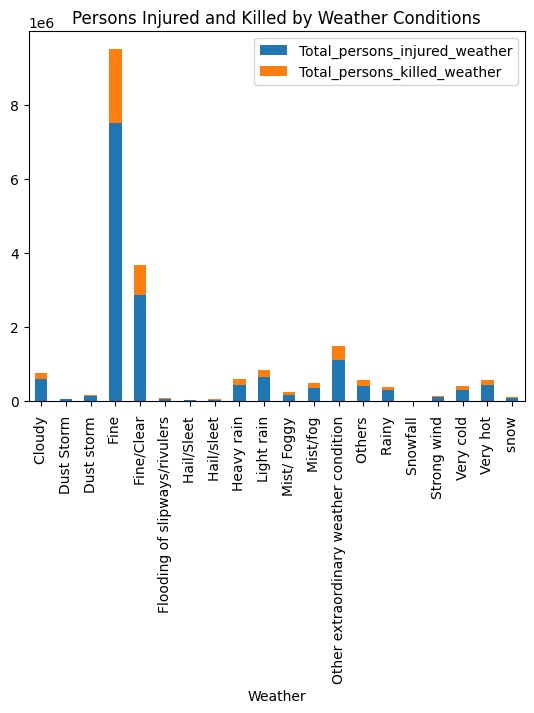

In [83]:
# Visualization 2: Persons Injured and Killed due to Weather Conditions
plt.figure(figsize=(10, 5))
df_weather = Combined_data.groupby('Weather')[['Total_persons_injured_weather', 'Total_persons_killed_weather']].sum().reset_index()
df_weather.plot(kind='bar', x='Weather', stacked=True)
plt.title('Persons Injured and Killed by Weather Conditions')
plt.show()

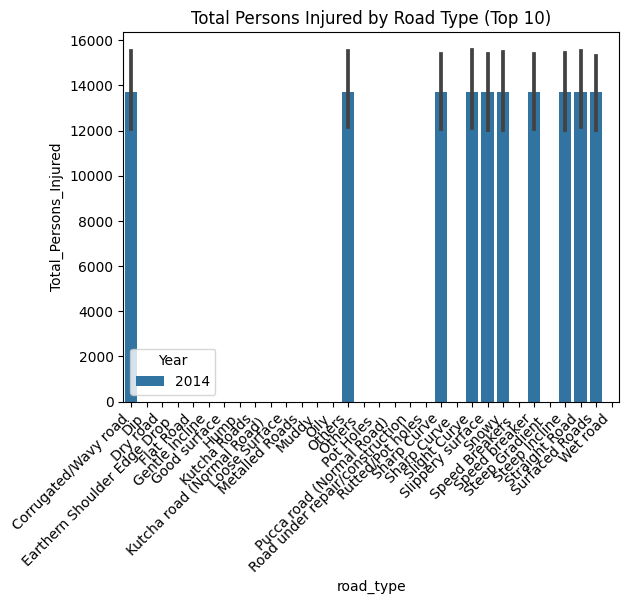

In [84]:
top_n = 10  # Adjust the value based on the number of road types you want to show
top_road_types = Combined_data.groupby('road_type')['Total_Persons_Injured'].sum().sort_values(ascending=False).head(top_n).index

sns.barplot(x='road_type', y='Total_Persons_Injured', data=Combined_data[Combined_data['road_type'].isin(top_road_types)], hue='Year')
plt.title('Total Persons Injured by Road Type (Top {})'.format(top_n))
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()


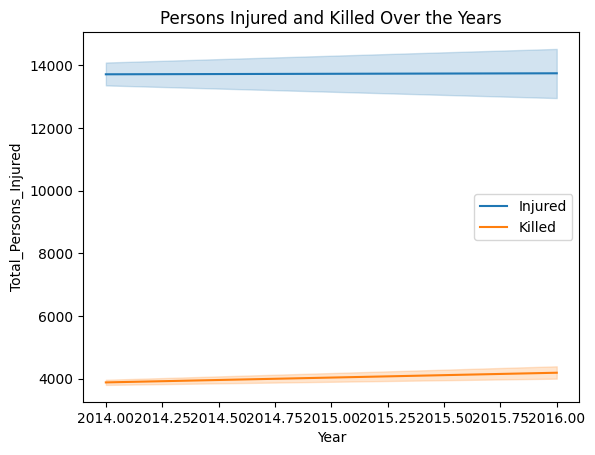

In [85]:
# Visualization 5: Persons Injured and Killed Over the Years
sns.lineplot(x='Year', y='Total_Persons_Injured', data=Combined_data, label='Injured')
sns.lineplot(x='Year', y='Total_Persons_killed', data=Combined_data, label='Killed')
plt.title('Persons Injured and Killed Over the Years')
plt.show()

In [86]:
Combined_data.columns

Index(['States/UTs', 'Year', 'road_type', 'Weather',
       'Total_persons_injured_road', 'Total_persons_injured_weather',
       'Total_Persons_Injured', 'Total_persons_killed_road',
       'Total_persons_killed_weather', 'Total_Persons_killed',
       'Total_accidents_road', 'Total_Accidents_weather', 'Total_population',
       'Zones'],
      dtype='object')

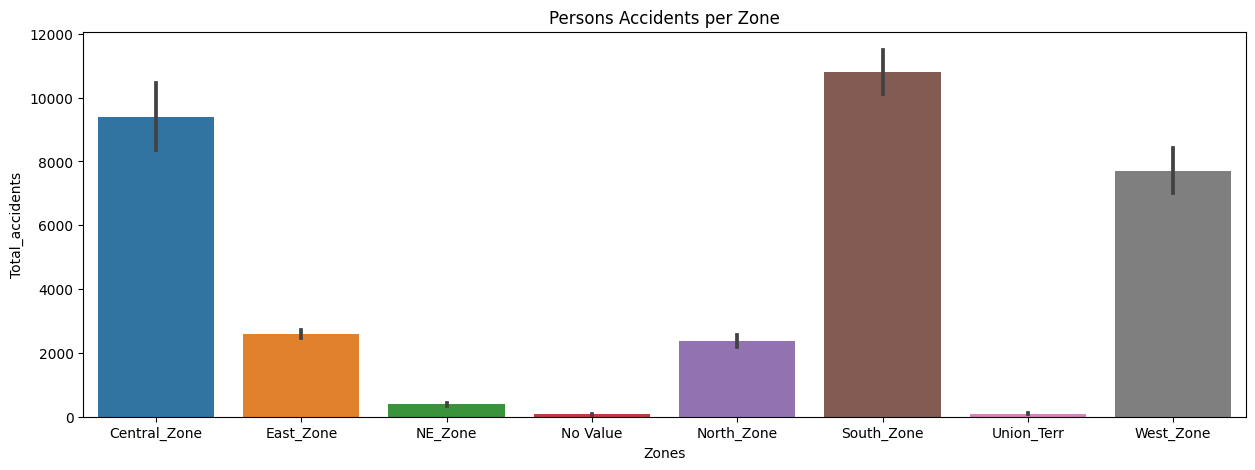

In [87]:
Combined_data['Total_accidents'] = np.add(Combined_data['Total_accidents_road'], Combined_data['Total_Accidents_weather'])

plt.figure(figsize=(15, 5))
sns.barplot(x='Zones', y='Total_accidents', data=Combined_data)
plt.title('Persons Accidents per Zone')
plt.show()

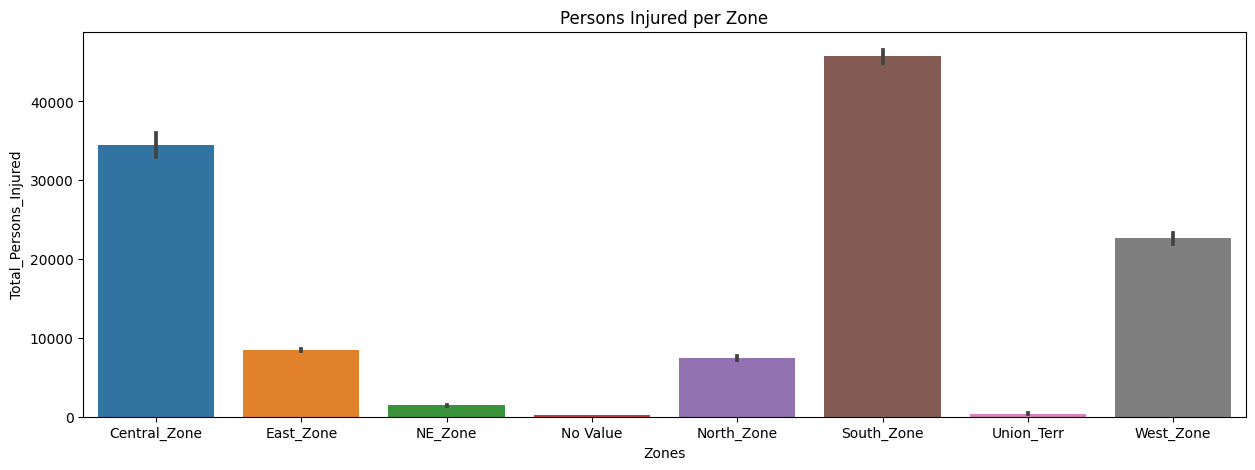

In [88]:
plt.figure(figsize=(15, 5))
sns.barplot(x='Zones', y='Total_Persons_Injured', data=Combined_data)
plt.title('Persons Injured per Zone')
plt.show()

If we observe data visuals we can say that South Zone has heighest no of injured peoples.

<Figure size 1500x500 with 0 Axes>

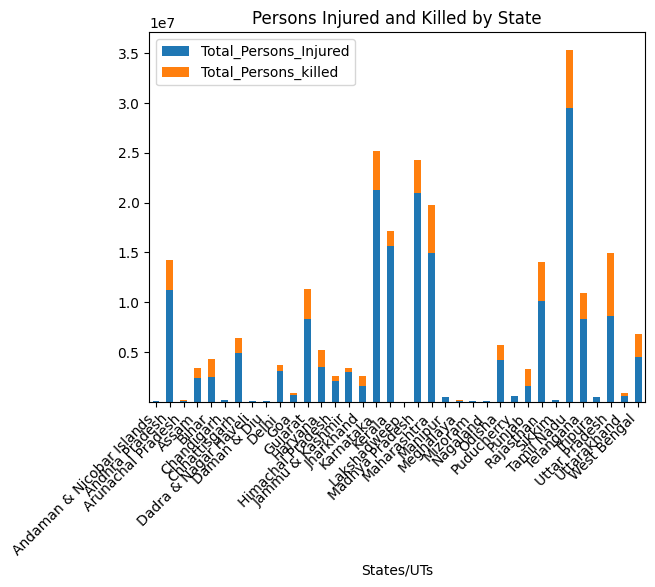

In [89]:
plt.figure(figsize=(15, 5))
df_state = Combined_data.groupby('States/UTs')[['Total_Persons_Injured', 'Total_Persons_killed']].sum().reset_index()
df_state.plot(kind='bar', x='States/UTs', stacked=True)
plt.title('Persons Injured and Killed by State')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()


In [90]:
Combined_data.columns

Index(['States/UTs', 'Year', 'road_type', 'Weather',
       'Total_persons_injured_road', 'Total_persons_injured_weather',
       'Total_Persons_Injured', 'Total_persons_killed_road',
       'Total_persons_killed_weather', 'Total_Persons_killed',
       'Total_accidents_road', 'Total_Accidents_weather', 'Total_population',
       'Zones', 'Total_accidents'],
      dtype='object')

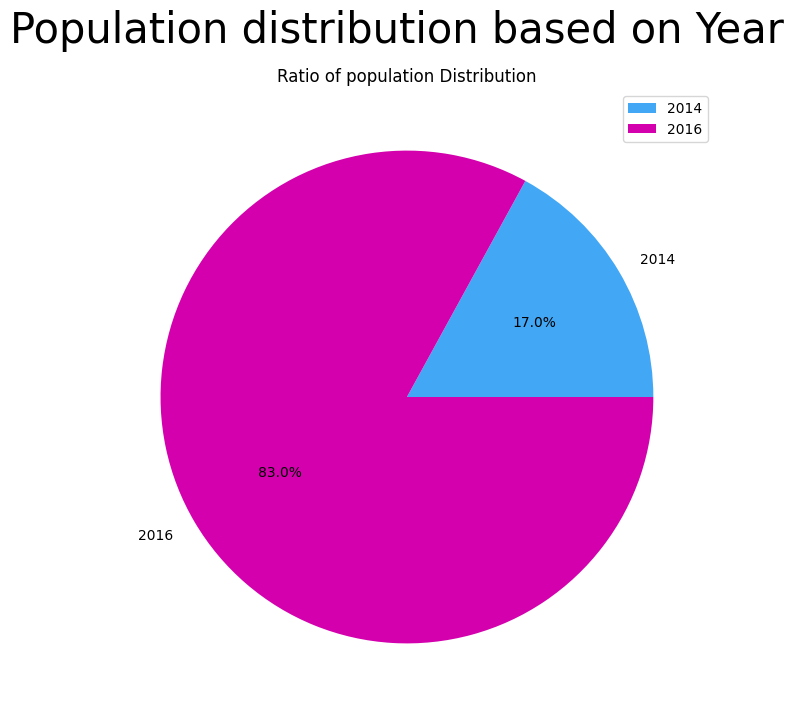

In [91]:
labels = Combined_data['Year'].unique()
values = Combined_data['Year'].value_counts(ascending=True)

fig, ax1 = plt.subplots(figsize=(8, 8))

ax1.pie(values, labels=labels, colors=['#42a7f5', '#d400ad'], autopct='%1.1f%%')
ax1.set(title='Ratio of population Distribution')
fig.suptitle('Population distribution based on Year', fontsize=30)
plt.legend()
plt.show()

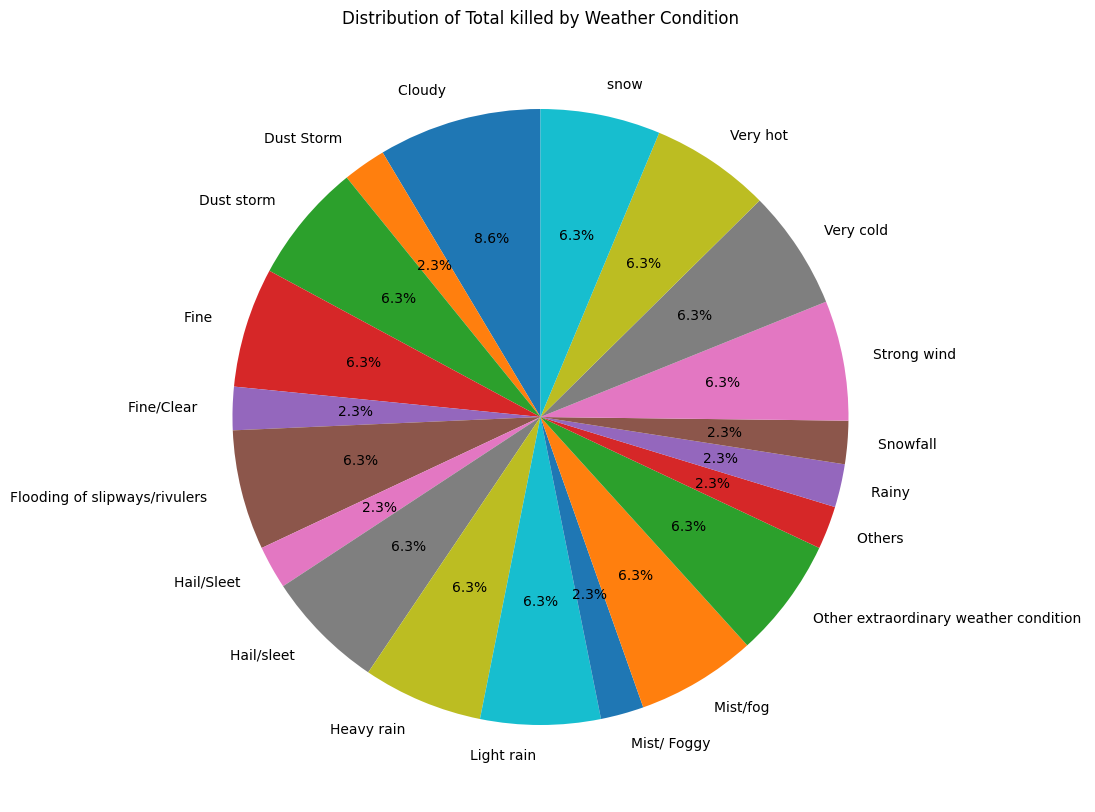

In [92]:
# Assuming 'weather_condition' is a categorical column
fatalities_by_weather = Combined_data.groupby('Weather')['Total_Persons_killed'].sum()

# Set figure size before creating the pie chart
plt.figure(figsize=(10, 10))

plt.pie(fatalities_by_weather, labels=fatalities_by_weather.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Total killed by Weather Condition')

plt.show()

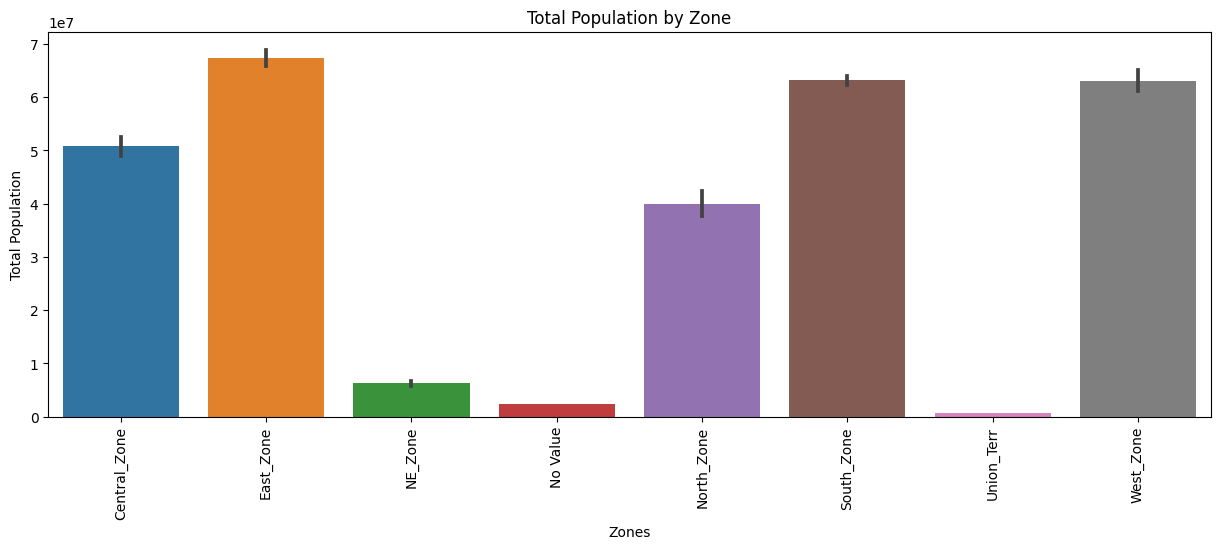

In [93]:
plt.figure(figsize=(15, 5))

# Create a bar plot
sns.barplot(x='Zones', y='Total_population', data=Combined_data)
plt.xlabel('Zones')
plt.ylabel('Total Population')
plt.title('Total Population by Zone')
plt.xticks(rotation=90, fontsize=10) 
plt.show()

In [94]:
Combined_data.columns

Index(['States/UTs', 'Year', 'road_type', 'Weather',
       'Total_persons_injured_road', 'Total_persons_injured_weather',
       'Total_Persons_Injured', 'Total_persons_killed_road',
       'Total_persons_killed_weather', 'Total_Persons_killed',
       'Total_accidents_road', 'Total_Accidents_weather', 'Total_population',
       'Zones', 'Total_accidents'],
      dtype='object')

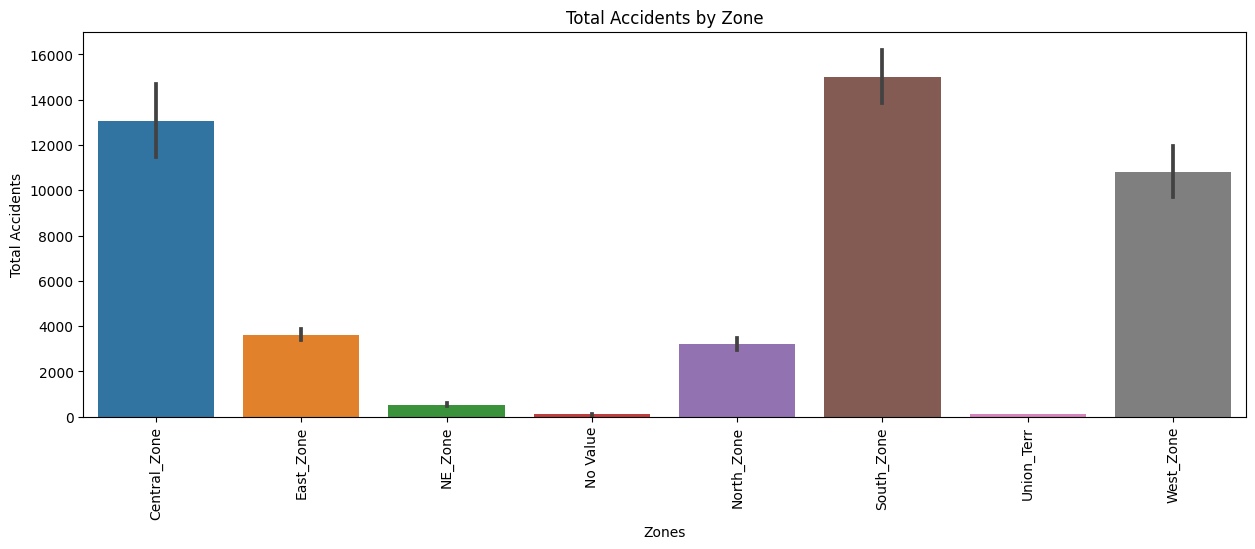

In [95]:
# Calculate total accidents
Combined_data['total_accidents'] = Combined_data['Total_accidents_road'] + Combined_data['Total_accidents_road']

# Set the figure size
plt.figure(figsize=(15, 5))

# Create a bar plot
sns.barplot(x='Zones', y='total_accidents', data=Combined_data)
plt.xlabel('Zones')
plt.ylabel('Total Accidents')
plt.title('Total Accidents by Zone')
plt.xticks(rotation=90, fontsize=10)
plt.show()

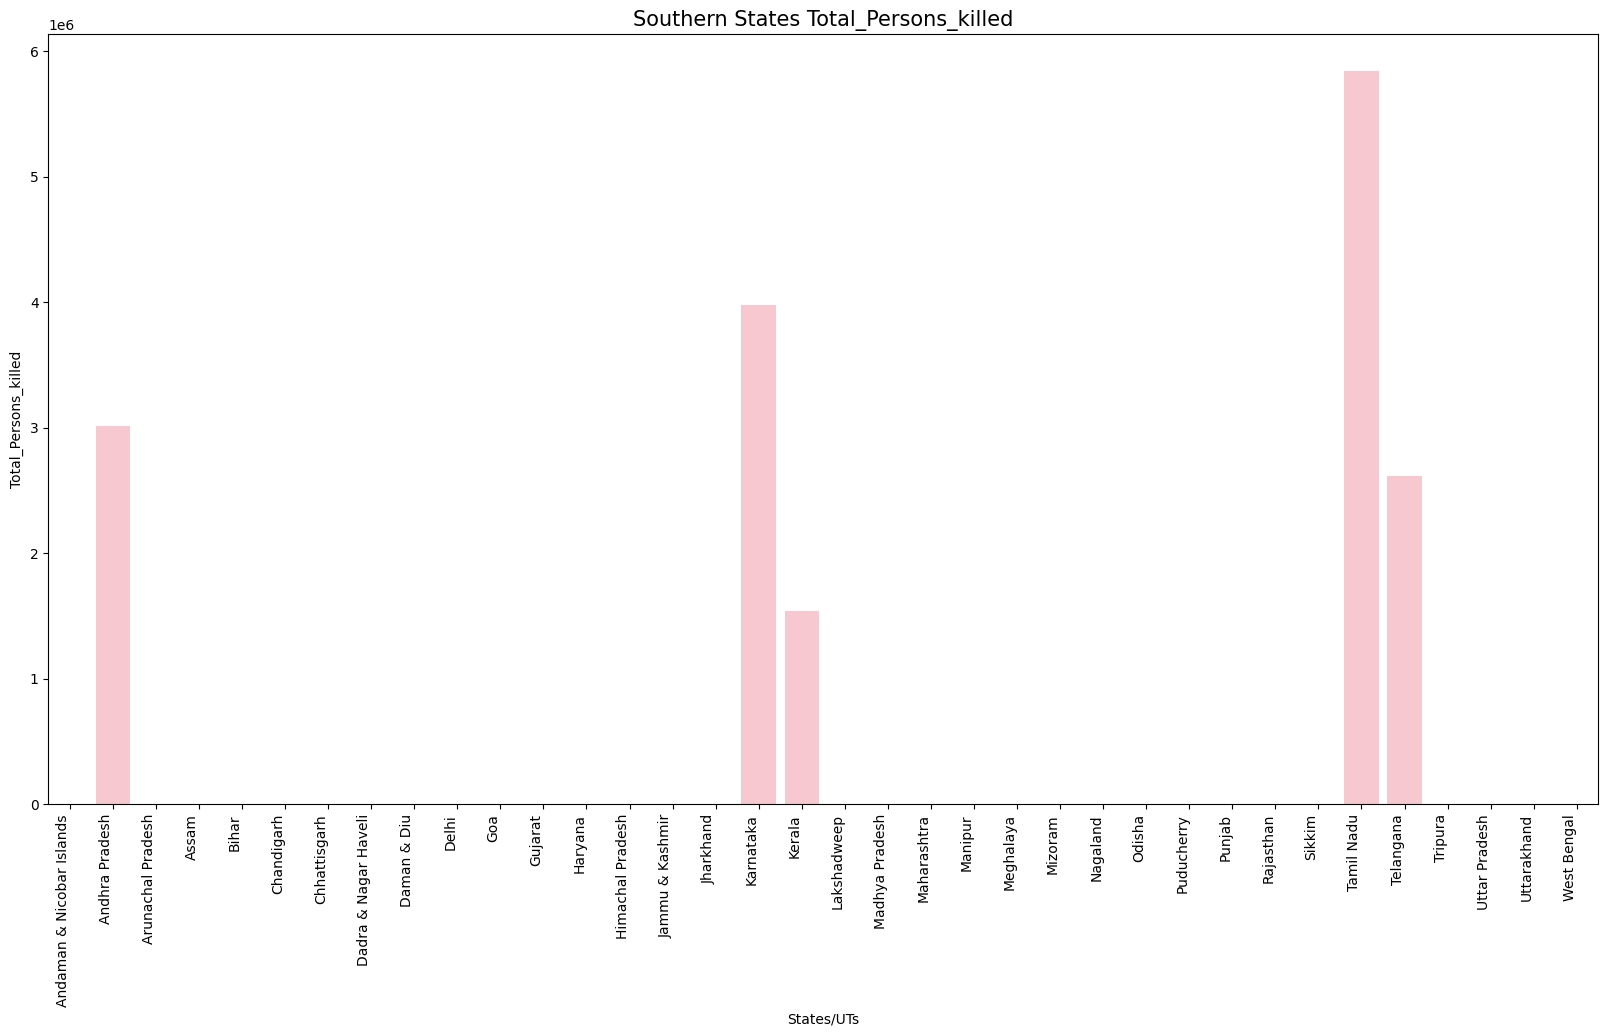

In [96]:
# Assuming 'total_population' is the column you want to include
sub_df = Combined_data[Combined_data['Zones'] == 'South_Zone']
df = pd.pivot_table(sub_df, index=['States/UTs'], values=['Total_Persons_killed'], aggfunc=np.sum).reset_index()
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
sns.barplot(x='States/UTs', y='Total_Persons_killed', data=df, ax=ax, color='pink')
plt.ylabel('Total_Persons_killed')
plt.title('Southern States Total_Persons_killed', fontsize=15)
plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels for better readability
plt.show()